### Car Prices Prediction with ML algorithms

pip install scikit-learn

pip install missingno

pip install --upgrade category_encoders

### Importing libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

### Reading the data

In [2]:
data = pd.read_csv('car_prices_prediction.csv')

In [3]:
data.shape

(11914, 16)

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Counterplot

- gives us a good understanding of the total number of elements present in a particular feature that we have considered.

#### Counterplot of different car companies

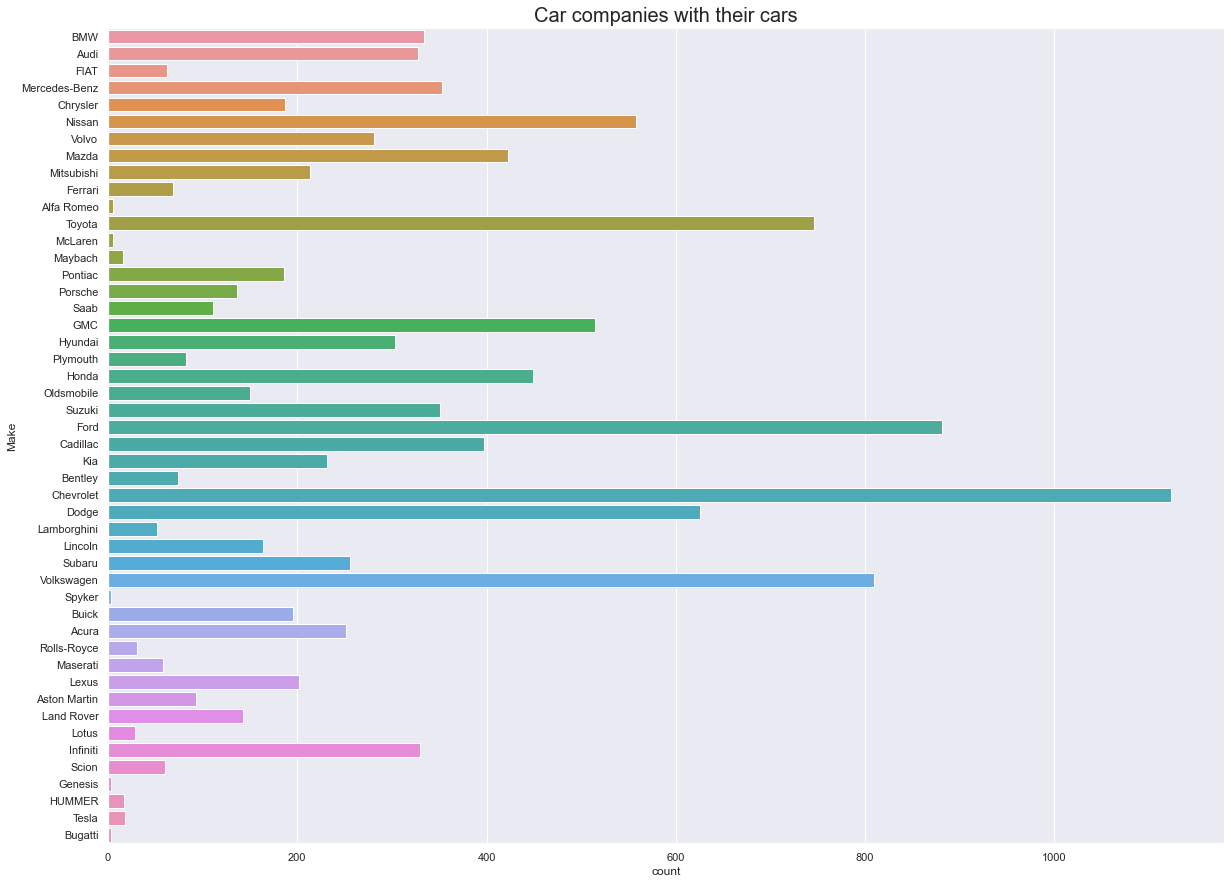

In [5]:
plt.figure(figsize = (20,15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

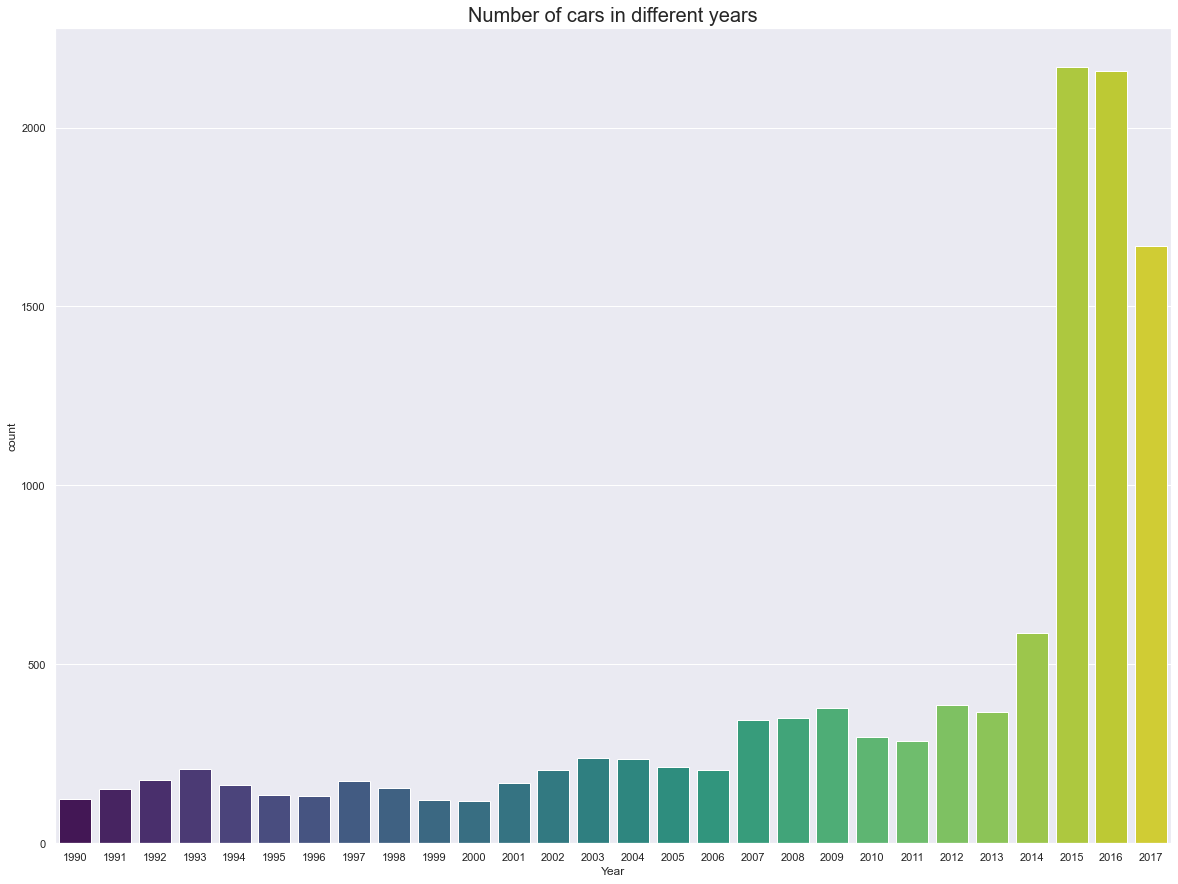

In [6]:
plt.figure(figsize = (20,15))
sns.countplot(data.Year, palette ='viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()


#### Counting the cars based on transmission type

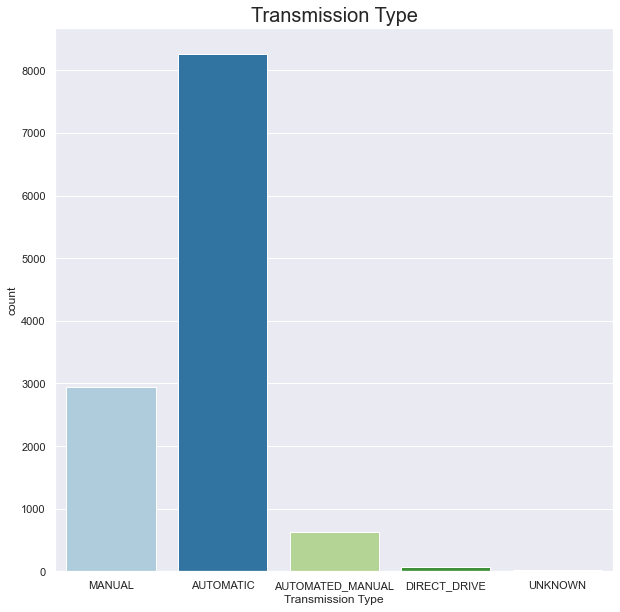

In [7]:
plt.figure(figsize = (10, 10))
sns.countplot(data['Transmission Type'], palette = 'Paired')
plt.title("Transmission Type",fontsize = 20)
plt.show()

We see that when we see the total number of cars based on transmission type, we find that there are many automatic cars as compared to the cars that are manual. There are a few automated_manual cars taht is second option for the buyer of the cars. Thus, we could see that most of the cars that we have chosen in our dataset are automatic.

### Getting the unique elements from the data

In [8]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [9]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Missingno

- is library from python
- is a very good graphical representation of missing values in our data.

<AxesSubplot:>

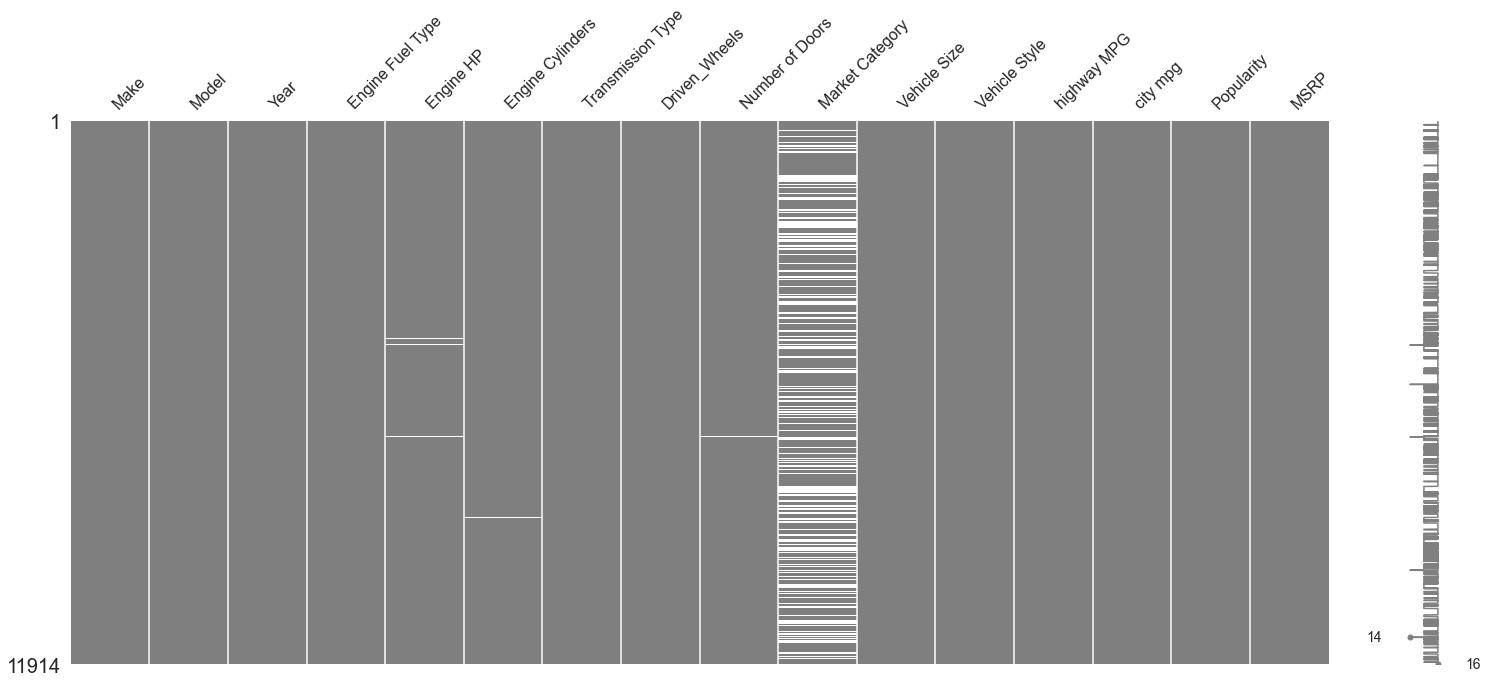

In [10]:
msno.matrix(data, color = (0.5, 0.5, 0.5))

We see tha there are many missing values in 'Market Category' feature. There are also a few missing values in 'Engine HP', 'Engine Cylinders' and 'Number of Doors' respectively.

### Groupby

- a function where the values are grouped based on feature or features that we give to the groupby function and things such as mean, median, mode or other aggregate functions could be performed once the data values are grouped together.

#### Groupby with 'Make' feature

In [11]:
data. groupby('Make')[['Engine HP','Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min','max','mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

#### Grouping the data on the basis of Year

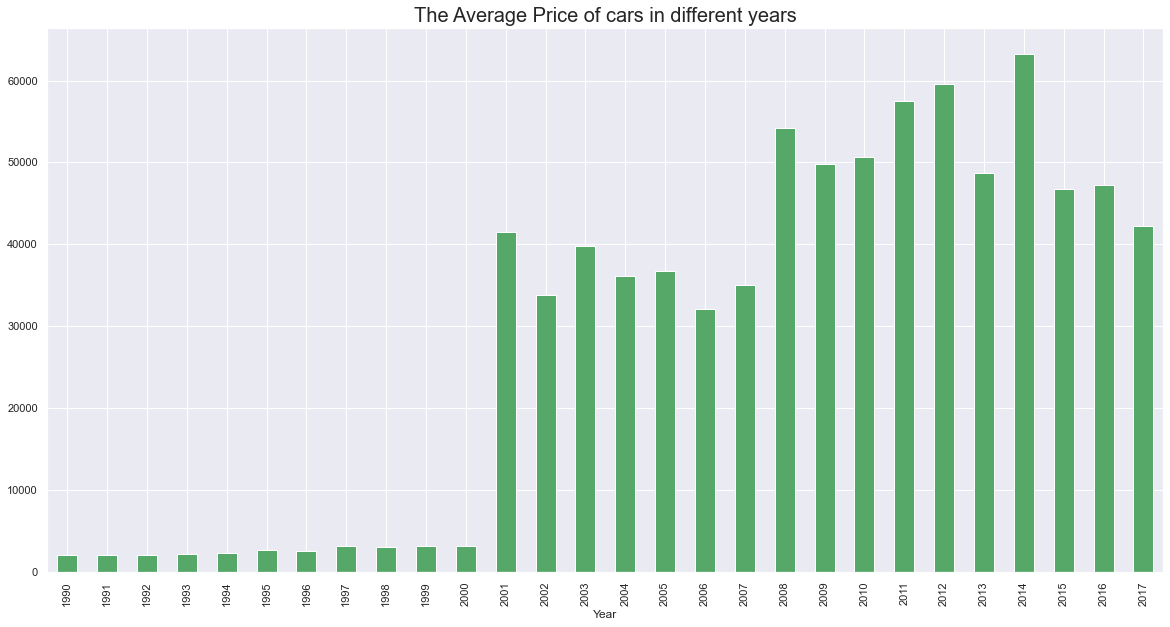

In [12]:
plt.figure(figsize = (20,10))
data.groupby('Year')['MSRP'].mean().plot(kind ='bar', color='g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

We see that the average prices of cars was the highest in the year 2014 followed by the year 2012. The average prices of cars that are in the year 2000 and below are pretty low as can be easily seen  from the plot. On average, we also find an interesting trend. As the years increase, we could see that the average prices of cars keep increasing but not in a steady way.

#### Grouping on the basis of Transmission Type

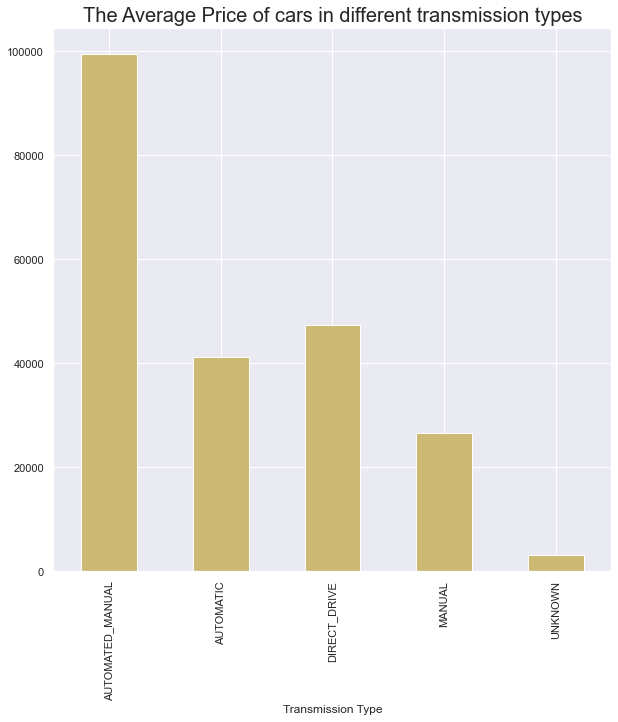

In [13]:
plt.figure(figsize = (10, 10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different transmission types", fontsize = 20)
plt.show()

We see that automated_manual cars have the highest average price. That is being followed by direct_drive cars. We expect the prices of cars tht are manual to be low compared to the prices of cars that are automatic.

#### Grouping on the basis of Make with "Engine HP' values

<AxesSubplot:ylabel='Make'>

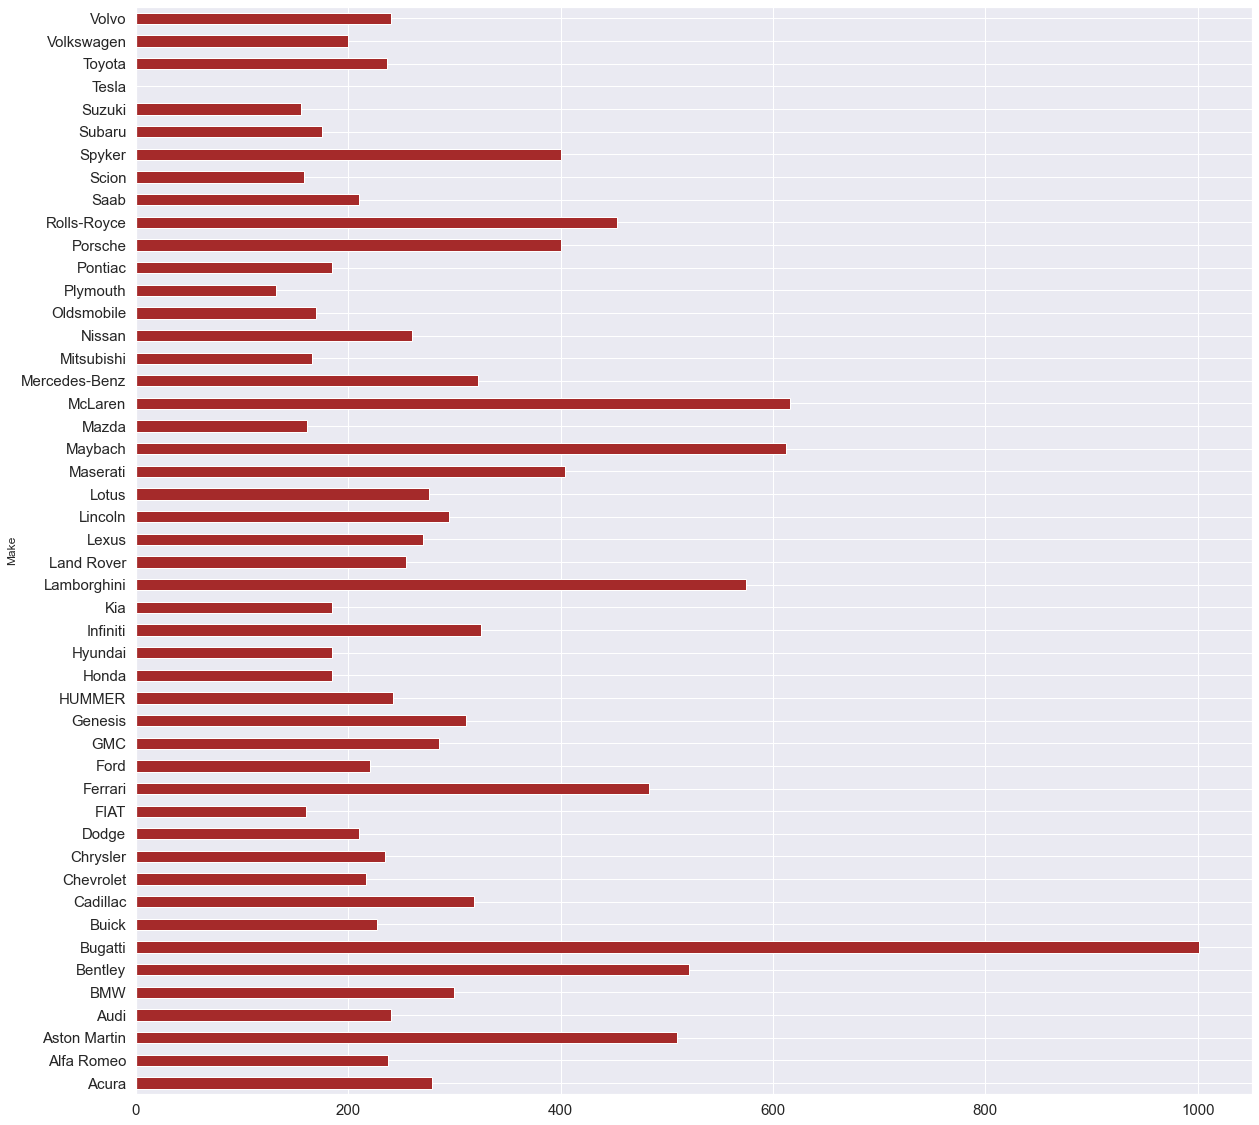

In [14]:
plt.figure(figsize = (20, 20))
data.groupby('Make').median()['Engine HP'].plot(kind ='barh', fontsize = 15, color = 'brown')

Bugatti to have the highest horse power (hp). In addition, there are other car makers such as McLaren and Maybach which also contain a good horse power (hp). Since, the horse power of 'tesla' is not known, therefore there is no bar depicted on the plot.

#### Grouping on the basis of Make with 'Popularity' values

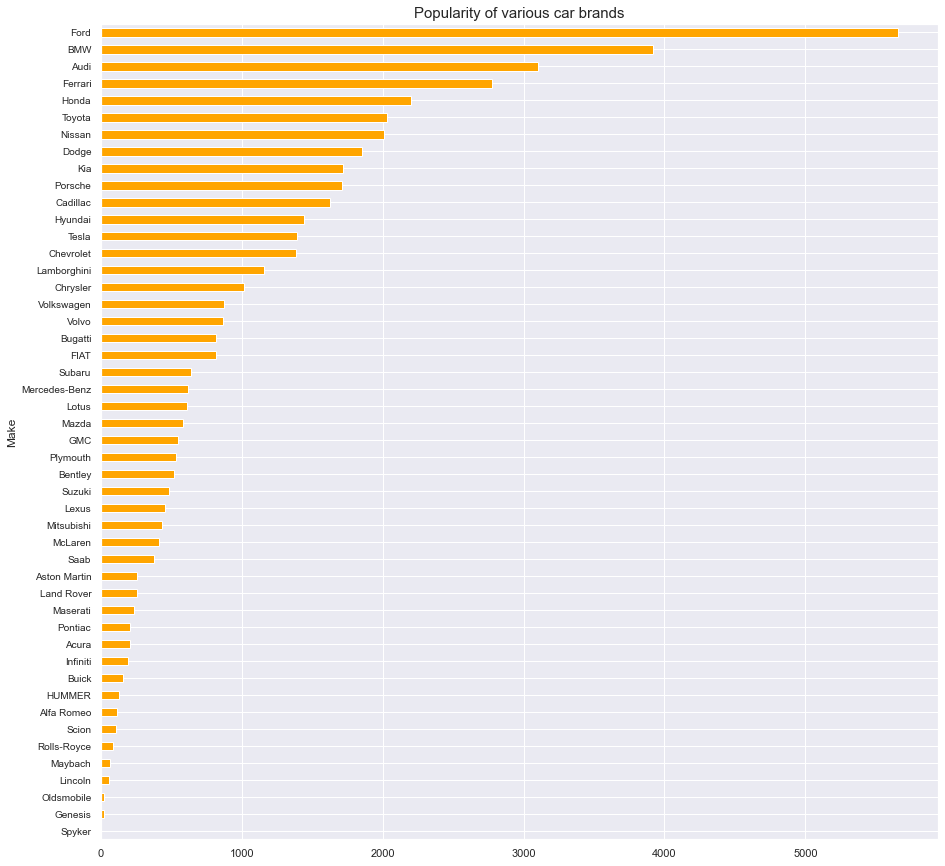

In [15]:
plt.figure(figsize = (15, 15))
data.groupby('Make').mean()['Popularity'].sort_values(ascending = True).plot(kind = 'barh', color ='orange')
plt.yticks(fontsize = 10)
plt.title('Popularity of various car brands', fontsize =15)
plt.show()
           

We see that 'Ford' is very popular all around our data. It is being followed by 'BMW' and 'Audi' respectively. We see that there are other car makers such as 'Lincoln' and 'Genesis' that are not so popular. 'Toyata' is also popular brand.

### Scatterplot between 'highway MPG' and 'city mpg'

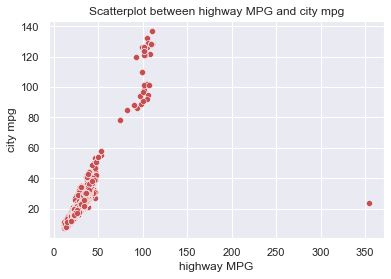

In [16]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color ='r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

A linear relationship between 'highway MPG' and 'city mpg' as they are very much correlated with each other. We see that there is one outliear where the highway MPG is about 350.  

In [17]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [18]:
data[data['highway MPG'] < 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


### Boxplot

- gives us a good understanding of how the data values are spread for different features. We could get to know the 25th, 50th, 75th percentile values present in different features. In addition, the outliers could be detected by making use of a formula and considering the interquartile range which is the difference between the 75th percentile and 25th percentile respectively.

#### Boxplot of highway MPG

<AxesSubplot:xlabel='highway MPG'>

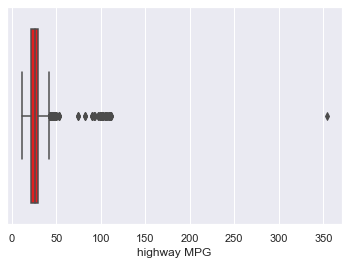

In [19]:
sns.boxplot(x = 'highway MPG', data= data, color='red')

We see that the average values are about 25 for highway MPG and we see the maximum value being equal to about 40 and the points above that to be outliers. We see that the data is not to spread as most of the values lie between 20 to 30 respectively.

### Calculating percentiles of highway MPG

In [20]:
for i in range(90,100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


In [21]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format (i, np.percentile(data['highway MPG'],i)))

The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 51.57
The 99.5th percentile value is 90.00
The 99.6th percentile value is 98.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 105.00
The 99.9th percentile value is 108.09


We see that 99.5th percentile values and so on have very high values and can be considered as outliers.

In [22]:
data = data[data['highway MPG']<60]

<AxesSubplot:xlabel='highway MPG'>

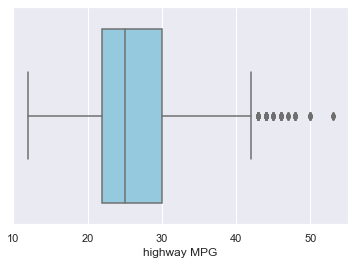

In [23]:
sns.boxplot(x = 'highway MPG', data = data, color='skyblue')

We find that the highway MPG is more skewed towards the right. We see a lot of values to the right of the mean. It means that more than 50 percent of the values are above 24 (mean)

### Calculating percentiles of city mpg

<AxesSubplot:xlabel='city mpg'>

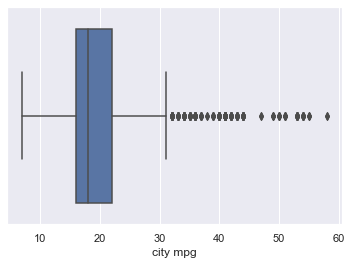

In [24]:
sns.boxplot(x = 'city mpg', data = data)

In [25]:
for i in range(90,100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 90.0th percentile value is 26.00
The 91.0th percentile value is 26.00
The 92.0th percentile value is 27.00
The 93.0th percentile value is 27.00
The 94.0th percentile value is 28.00
The 95.0th percentile value is 29.00
The 96.0th percentile value is 30.00
The 97.0th percentile value is 31.00
The 98.0th percentile value is 32.00
The 99.0th percentile value is 41.00


In [26]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format (i, np.percentile(data['city mpg'],i)))

The 99.0th percentile value is 41.00
The 99.1th percentile value is 41.00
The 99.2th percentile value is 41.00
The 99.3th percentile value is 42.00
The 99.4th percentile value is 43.00
The 99.5th percentile value is 44.00
The 99.6th percentile value is 44.00
The 99.7th percentile value is 50.00
The 99.8th percentile value is 53.00
The 99.9th percentile value is 54.00


In [27]:
data = data[data['city mpg'] < 40]

<AxesSubplot:xlabel='city mpg'>

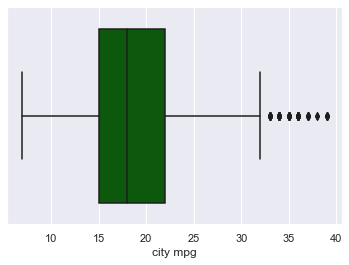

In [28]:
sns.boxplot (x = 'city mpg', data= data, color ='darkgreen')

We see again that the data is right skewed.

### Boxplot of 2 features 'city mpg' and 'highway MPG'

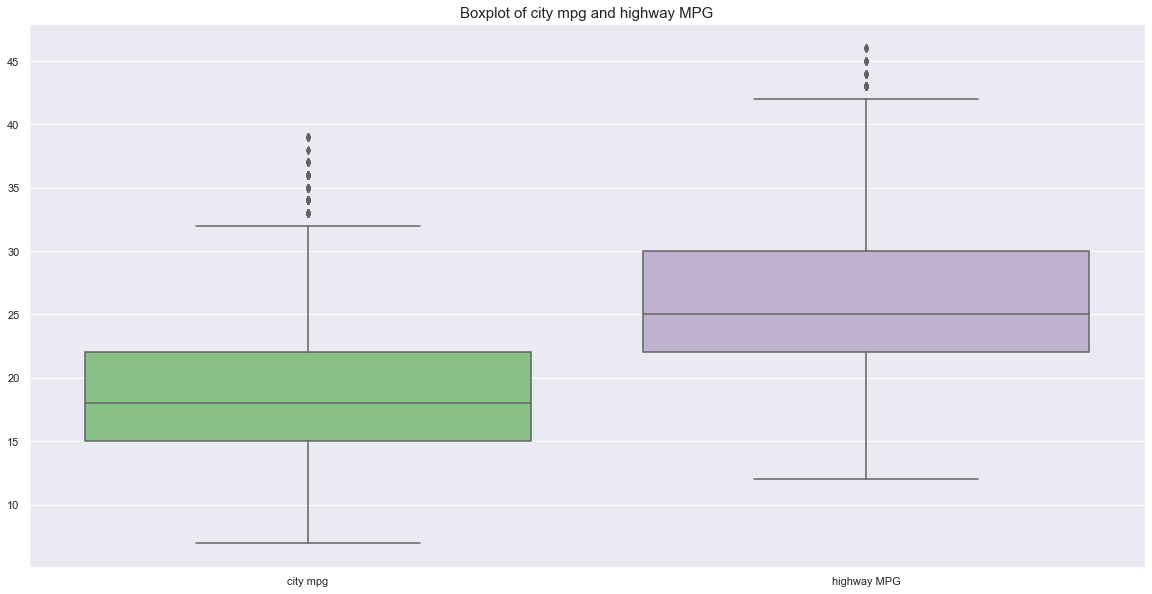

In [29]:
plt.figure(figsize= (20, 10))
sns.boxplot(data = data[['city mpg','highway MPG']], palette ='Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize =15)
plt.show()

We see that in terms of 'city mpg' most of the values that are present are in the range between 15 to 22 respectively. On the other hand, we find that most of the values that are present in 'highway MPG' are in the range 22 to 30 respectively.

### Implot between 'Engine HP' and 'Popularity'

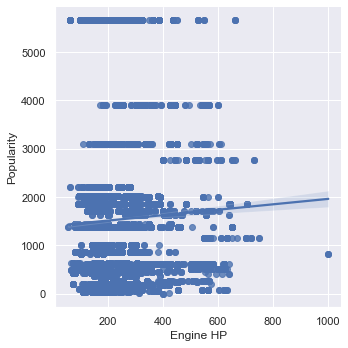

In [30]:
sns.set(rc = {'figure.figsize': (20,20)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data= data)

We see that most of the data is not related. However, there is a linear line which has a positive slope. It means htat with the increase in 'Engine HP', there is a higher chance of increase in 'Popularity' respectively.

### Heatmap

<AxesSubplot:>

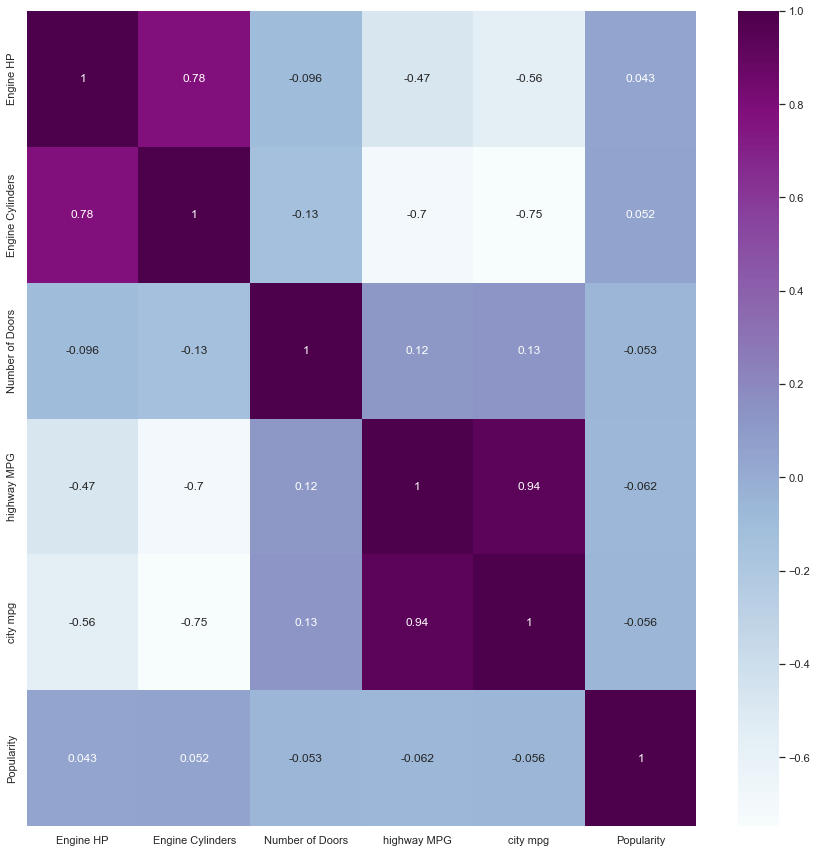

In [31]:
plt.figure(figsize = (15,15))
numeric_columns = ['Engine HP','Engine Cylinders','Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap='BuPu', annot =True)

We see that 'highway MPG' and 'city mpg' are highly correlated. That is the reason that we got a value of about 0.94. In addition to this, we see that 'Engine Horsepower' and 'Engine Cylinders' are correlated. That is true as having a higher number of cylinders would ensure that there is a high horsepower on a car.

### Checking the NULL values

In [32]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              21
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [33]:
data['Number of Doors'].median()

4.0

In [34]:
data['Number of Doors'].fillna(4.0, inplace = True)

In [35]:
data['Number of Doors'].isnull().sum()

0

### Creating a new column

In [36]:
data['Present Year'] = 2021

In [37]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2021
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2021
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2021
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2021
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2021


In [38]:
data['Years of Manufacture'] = data['Present Year']-data['Year']

In [39]:
data.drop(['Present Year'], inplace = True, axis =1)

In [40]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years of Manufacture
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,10
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,10
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,10
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,10
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,10


### Plotting the barplot of 'Years of Manufacture'

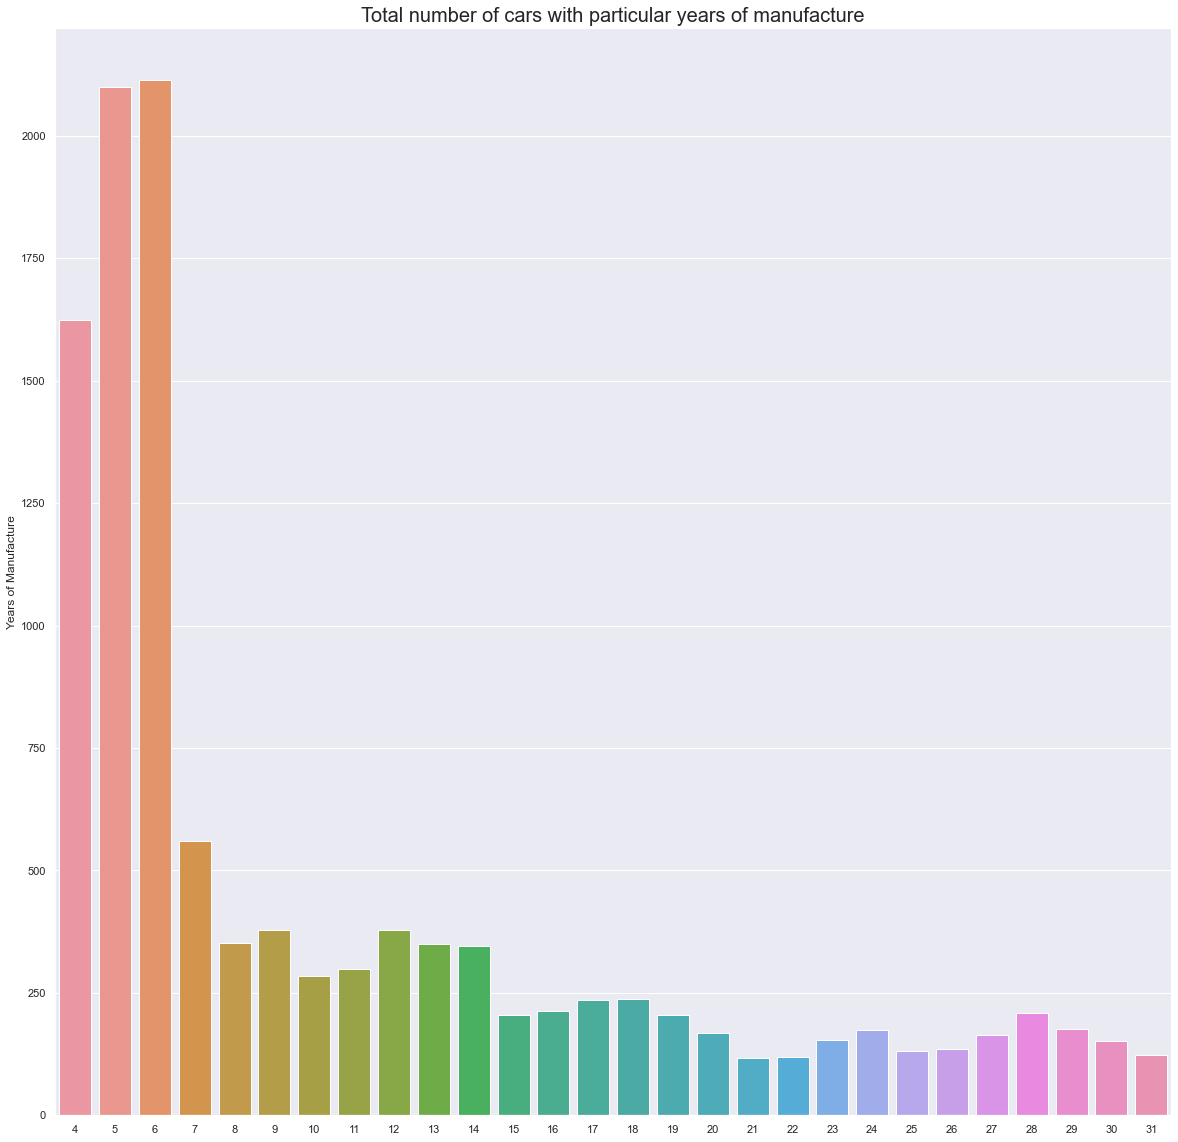

In [41]:
sns.barplot(y=data['Years of Manufacture'].value_counts(), x = data['Years of Manufacture'].value_counts().index)
plt.title("Total number of cars with particular years of manufacture", fontsize =20)
plt.show()


We see that most of the values are about 6 years old. Therefore, we are working with young cars as there are some other cars in our data that are about 31 years old. These cars are very few in number.

#### Unique values in 'Engine Fuel Type'

In [42]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [43]:
type("data['Engine Fuel Type'].mode()")

str

In [44]:
data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)

In [45]:
data['Engine Fuel Type'].isnull().sum()

0

In [46]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                 21
Engine Cylinders          20
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years of Manufacture       0
dtype: int64

In [47]:
data['Engine HP'].mean()

250.75316672372475

In [48]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11705 entries, 0 to 11913
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  11705 non-null  object 
 1   Model                 11705 non-null  object 
 2   Year                  11705 non-null  int64  
 3   Engine Fuel Type      11705 non-null  object 
 4   Engine HP             11684 non-null  float64
 5   Engine Cylinders      11685 non-null  float64
 6   Transmission Type     11705 non-null  object 
 7   Driven_Wheels         11705 non-null  object 
 8   Number of Doors       11705 non-null  float64
 9   Market Category       7968 non-null   object 
 10  Vehicle Size          11705 non-null  object 
 11  Vehicle Style         11705 non-null  object 
 12  highway MPG           11705 non-null  int64  
 13  city mpg              11705 non-null  int64  
 14  Popularity            11705 non-null  int64  
 15  MSRP               

In [49]:
data['Engine HP'].median()

230.0

In [50]:
data['Engine HP'].fillna(data['Engine HP'].median(), inplace = True)

In [51]:
data['Engine HP'].isnull().sum()

0

In [52]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan, 16.])

In [53]:
data['Engine Cylinders'].fillna(4, inplace = True)

In [54]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years of Manufacture       0
dtype: int64

In [55]:
data.drop(['Market Category'], inplace = True, axis =1)

In [56]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years of Manufacture    0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11705 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  11705 non-null  object 
 1   Model                 11705 non-null  object 
 2   Year                  11705 non-null  int64  
 3   Engine Fuel Type      11705 non-null  object 
 4   Engine HP             11705 non-null  float64
 5   Engine Cylinders      11705 non-null  float64
 6   Transmission Type     11705 non-null  object 
 7   Driven_Wheels         11705 non-null  object 
 8   Number of Doors       11705 non-null  float64
 9   Vehicle Size          11705 non-null  object 
 10  Vehicle Style         11705 non-null  object 
 11  highway MPG           11705 non-null  int64  
 12  city mpg              11705 non-null  int64  
 13  Popularity            11705 non-null  int64  
 14  MSRP                  11705 non-null  int64  
 15  Years of Manufactur

In [58]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [59]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

### Manipulation of Data

#### Shuffling the data

In [60]:
shuffled_data = shuffle(data, random_state =100)
X = shuffled_data.drop(['MSRP'], axis =1)
y = shuffled_data['MSRP']

#### Dividing the data into training and testing set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =100)

In [62]:
print("The size of the input train data is: {}".format(X_train.shape))

The size of the input train data is: (9364, 15)


In [63]:
print("The size of the output train data is: {}".format(y_train.shape))

The size of the output train data is: (9364,)


In [64]:
print("The size of the input test data is: {}".format(X_test.shape))

The size of the input test data is: (2341, 15)


In [65]:
print("The size of the output test data is: {}".format(y_test.shape))

The size of the output test data is: (2341,)


#### Encoding the data

In [66]:
encoder = TargetEncoder(cols = 'Year')

In [67]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years of Manufacture
1354,Oldsmobile,Alero,2003,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,900,1997,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,C/K 1500 Series,1997,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,V8 Vantage,2015,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,Civic,2015,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


In [68]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'])

TargetEncoder(cols=['Year'])

In [69]:
X_train['Year']=encoder.transform(X_train['Year'])

In [70]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years of Manufacture
1354,Oldsmobile,Alero,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,900,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,C/K 1500 Series,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,V8 Vantage,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,Civic,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


In [71]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model']= encoder.transform(X_train['Model'])
X_test['Model']= encoder.transform(X_test['Model'])

In [72]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make']= encoder.transform(X_train['Make'])
X_test['Make']= encoder.transform(X_test['Make'])

In [73]:
X_train["Engine Fuel Type"].unique()

array(['regular unleaded', 'premium unleaded (required)', 'diesel',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)',
       'flex-fuel (premium unleaded recommended/E85)',
       "data['Engine Fuel Type'].mode()", 'natural gas'], dtype=object)

In [74]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years of Manufacture
1354,10812.757938,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,28423.023983,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,28230.392090,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,196884.138144,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,26660.798742,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


#### One Hot Encoding

In [75]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type','Transmission Type', 'Driven_Wheels','Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type','Transmission Type', 'Driven_Wheels','Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type','Transmission Type', 'Driven_Wheels','Vehicle Size', 'Vehicle Style']])

In [76]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

In [77]:
X_train.drop(['Engine Fuel Type','Transmission Type', 'Driven_Wheels','Vehicle Size', 'Vehicle Style'],axis=1, inplace = True)
X_test.drop(['Engine Fuel Type','Transmission Type', 'Driven_Wheels','Vehicle Size', 'Vehicle Style'],axis=1, inplace = True)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9364 entries, 1354 to 2564
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  9364 non-null   float64
 1   Model                 9364 non-null   float64
 2   Year                  9364 non-null   float64
 3   Engine HP             9364 non-null   float64
 4   Engine Cylinders      9364 non-null   float64
 5   Number of Doors       9364 non-null   float64
 6   highway MPG           9364 non-null   int64  
 7   city mpg              9364 non-null   int64  
 8   Popularity            9364 non-null   int64  
 9   Years of Manufacture  9364 non-null   int64  
 10  Engine Fuel Type_1    9364 non-null   int64  
 11  Engine Fuel Type_2    9364 non-null   int64  
 12  Engine Fuel Type_3    9364 non-null   int64  
 13  Engine Fuel Type_4    9364 non-null   int64  
 14  Engine Fuel Type_5    9364 non-null   int64  
 15  Engine Fuel Type_6

### 3.5 Standardization and Normalization of data

In [79]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [80]:
X_train_new.shape

(9364, 47)

In [81]:
error_mean_square = []
error_mean_absolute = []

#### Machine Learning Analysis

##### 4.1 Linear regression

In [82]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

In [83]:
y_predict = model.predict(X_test_new)

In [84]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [85]:
error_mean_absolute 

[19055]

In [86]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [87]:
y_predict.head()

,Predicted Output
0,1332.697580
1,18161.804943
2,55545.530373
3,13095.054251
4,287273.335710


In [88]:
results = pd.concat([y_predict,y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index =False )

In [89]:
results.head()

,Predicted Output,MSRP
0,1332.697580,24660
1,18161.804943,2000
2,55545.530373,49770
3,13095.054251,20875
4,287273.335710,284976


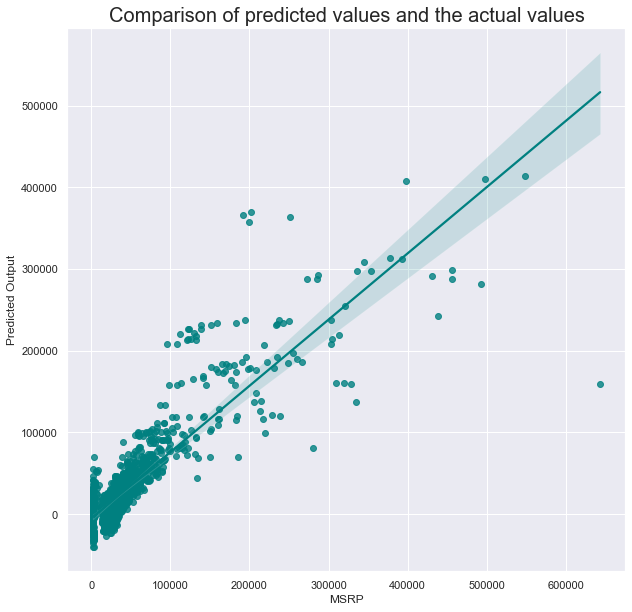

In [90]:
plt.figure(figsize = (10,10))
sns.regplot(data = results, y="Predicted Output", x="MSRP", color="teal",marker='o')
plt.title("Comparison of predicted values and the actual values", fontsize=20)
plt.show()

#### Support Vector Regression

In [91]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results=pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis=1, ignore_index=False)

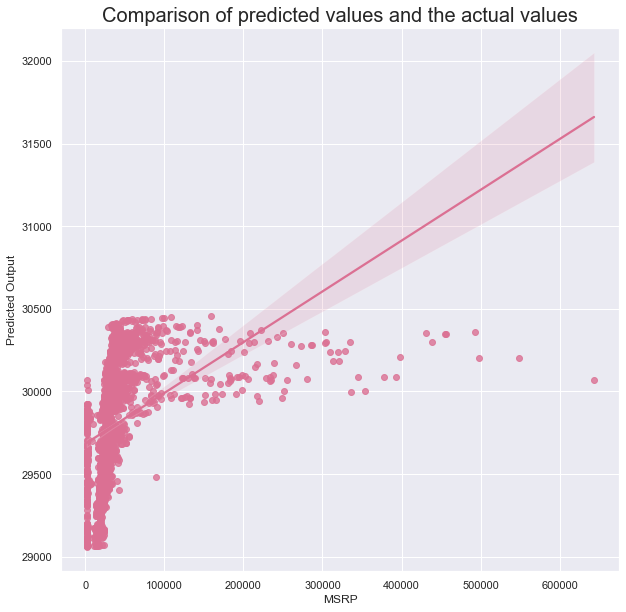

In [92]:
plt.figure(figsize = (10,10))
sns.regplot(data = results, y="Predicted Output", x="MSRP", color="palevioletred",marker='o')
plt.title("Comparison of predicted values and the actual values", fontsize=20)
plt.show()

In [93]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

#### K-Neighbour Regressor

In [94]:
model =KNeighborsRegressor(n_neighbors=2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results=pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis=1, ignore_index=False)

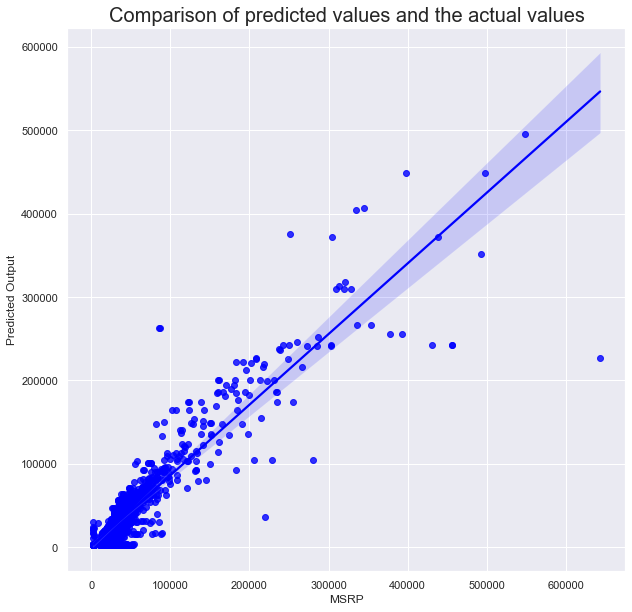

In [95]:
plt.figure(figsize = (10,10))
sns.regplot(data = results, y="Predicted Output", x="MSRP", color="blue",marker='o')
plt.title("Comparison of predicted values and the actual values", fontsize=20)
plt.show()

In [96]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

#### PLS Regressor 

In [97]:
model = PLSRegression(n_components=20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results=pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis=1, ignore_index=False)

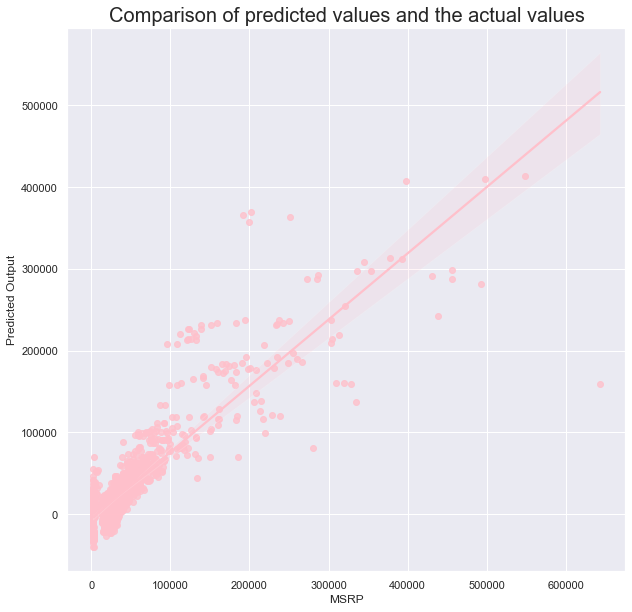

In [98]:
plt.figure(figsize = (10,10))
sns.regplot(data = results, y="Predicted Output", x="MSRP", color="pink",marker='o')
plt.title("Comparison of predicted values and the actual values", fontsize=20)
plt.show()

In [99]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

#### Decision Tree Regressor

In [100]:
model = DecisionTreeRegressor(splitter='random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results=pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis=1, ignore_index=False)

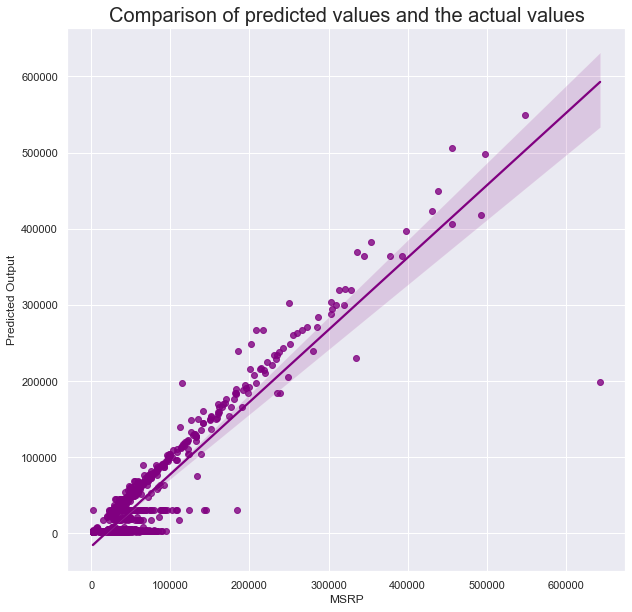

In [101]:
plt.figure(figsize = (10,10))
sns.regplot(data = results, y="Predicted Output", x="MSRP", color="purple",marker='o')
plt.title("Comparison of predicted values and the actual values", fontsize=20)
plt.show()

In [102]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

#### Gradient Boosting Regressor

In [103]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results=pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis=1, ignore_index=False)

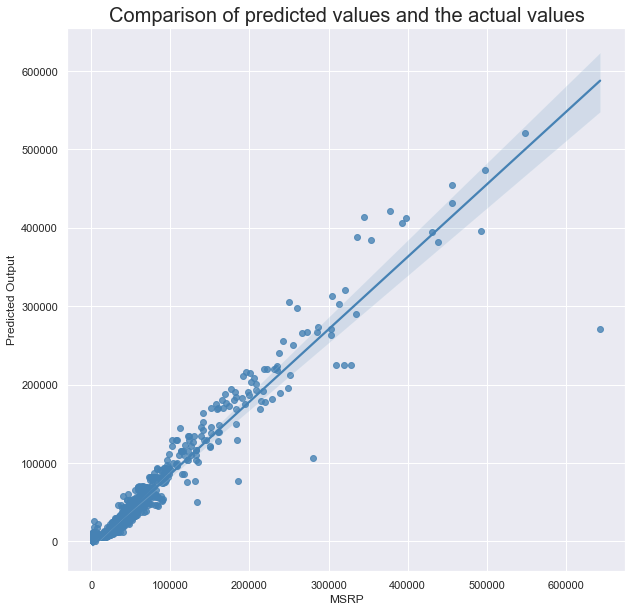

In [104]:
plt.figure(figsize = (10,10))
sns.regplot(data = results, y="Predicted Output", x="MSRP", color="steelblue",marker='o')
plt.title("Comparison of predicted values and the actual values", fontsize=20)
plt.show()

In [105]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

####  MLP Regressor

In [106]:
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate='adaptive')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results=pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis=1, ignore_index=False)

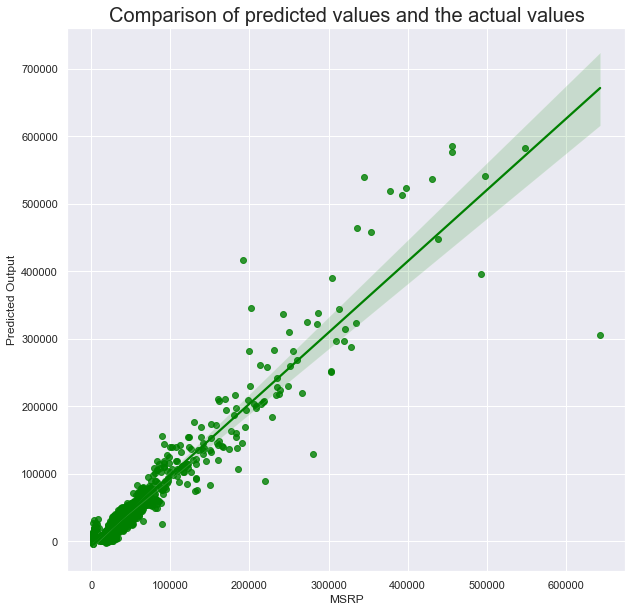

In [107]:
plt.figure(figsize = (10,10))
sns.regplot(data = results, y="Predicted Output", x="MSRP", color="green",marker='o')
plt.title("Comparison of predicted values and the actual values", fontsize=20)
plt.show()

In [108]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

#### Dataframe of Machine Learning Models

In [109]:
data = {'Model':['Linear Regression', 'Support Vector Regressor', 'K Nearest Regressor', 'PLS Regression', 'Decision Tree Regressor','Gradient Boosting Regressor', 'MLP Regressor'], 'Mean Absolute Error':error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe=pd.DataFrame(data)

In [110]:
model_dataframe

,Model,Mean Absolute Error,Mean Squared Error
0,Linear Regression,19055,800372337
1,Support Vector Regressor,22371,2646702582
2,K Nearest Regressor,9244,415698957
3,PLS Regression,19097,802054925
4,Decision Tree Regressor,20362,764475879
5,Gradient Boosting Regressor,10650,244423684
6,MLP Regressor,9819,316264576


#### Mean Absolute Error Square Plot

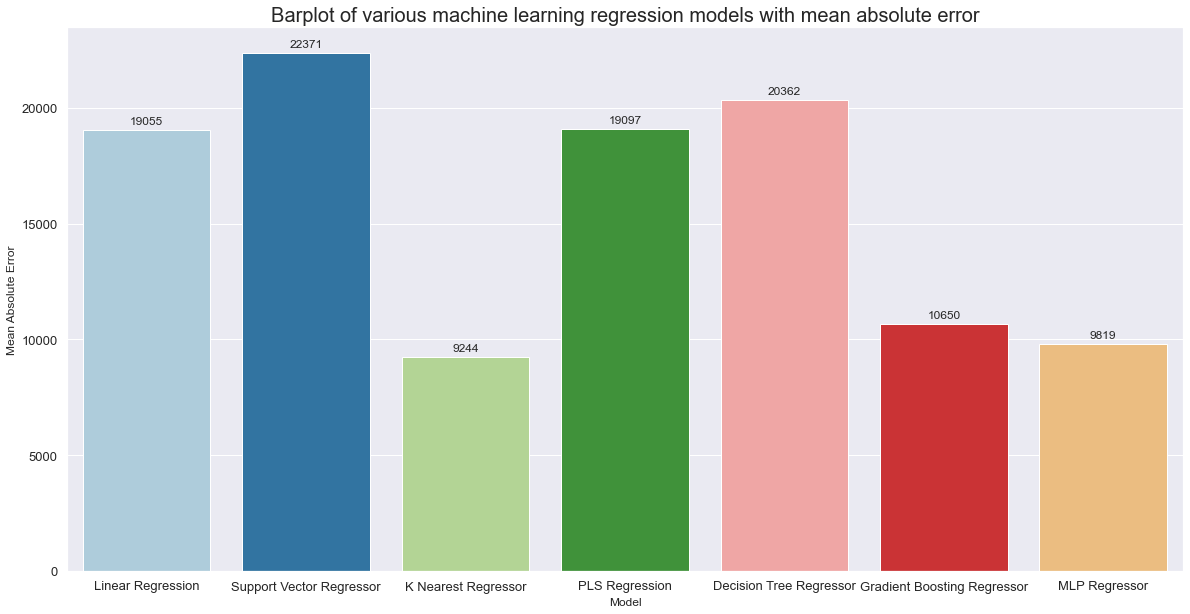

In [111]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Model', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()

#### Mean Square Error

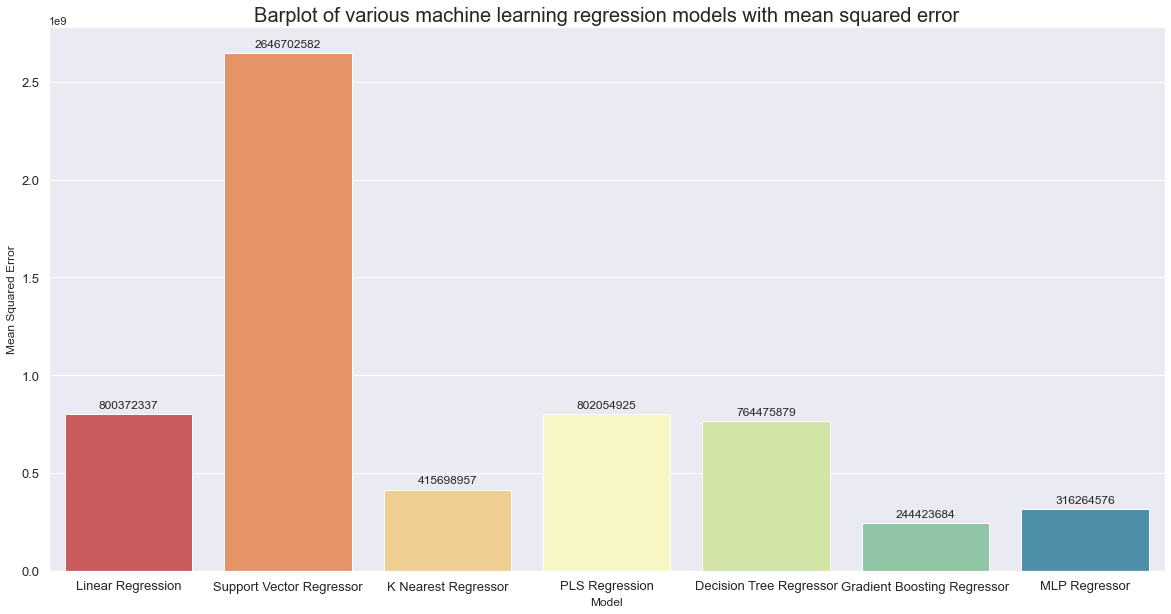

In [112]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Model', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

####  Conclusion

1. We can see the using different machine learning models would lead to different values of mean absolute error and mean squared error respectively.
2. We would have the first convert all the categorical features into numerical features before we give those data points to the machine leanrning models for prediction. If we just give categorical features directly, there would be an error in the machine learning models respectively.
3. It is always good to shuffle the data before split the data into training and testing set. This is done so that we have more randomness in the training data so that the machine learning models would work well on new data.
4. We have to always ensure that there are no missing values in our data. We have to replace those values so that there is no problem when we are using different machine learning models for our predictions.
5. We have to also remove the outliers in our data as they would completely change some of the important predictions and lead to an increase in the error respectively.